In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

!ls /mydrive

'AI Machine Learning Exam.gdoc'		     image-parse
'archive (1).zip (Unzipped Files)'	     image-parse-new
'archive (1).zip (Unzipped Files) (1)'	     image-parse.zip
'archive (1).zip (Unzipped Files) (2)'	    'image-parse.zip (Unzipped Files)'
 cloth-mask				    'JPPNet-s2.zip (Unzipped Files)'
 cloth_parse				    'My Drive'
'Colab Notebooks'			     networks.py
 CP-VTON+				     pose
 cp-vton-plus				     requirements.txt
'cp-vton-plus-master.zip (Unzipped Files)'   test
'custom_images.unzip '			     test.py
 data					     train.py
 dataset_neck_skin_correction.py	     viton_plus
 food-101				     women-parse
 image-mask


In [3]:
!git clone https://github.com/AlexeyAB/darknet.git
 
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15132, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15132 (delta 26), reused 44 (delta 20), pack-reused 15073
Receiving objects: 100% (15132/15132), 13.50 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (10272/10272), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
        

In [9]:
%cd /content/darknet/

/content/darknet


In [10]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

In [11]:
!mkdir data/obj

In [13]:
!unzip  /mydrive/license-plate-detection/Dataset.zip -d data/obj

Archive:  /mydrive/license-plate-detection/Dataset.zip
  inflating: data/obj/dataset/car_9_jpg.rf.b3a57a00295d6b072037a24dd5dc8da0.jpg  
  inflating: data/obj/dataset/car_9_jpg.rf.926a6549f4ac278c6094ff8e2288e33e.txt  
  inflating: data/obj/dataset/car_9_jpg.rf.926a6549f4ac278c6094ff8e2288e33e.jpg  
  inflating: data/obj/dataset/car_9_jpg.rf.03282a01e72f6c901b789ad9bb7dadd8.txt  
  inflating: data/obj/dataset/car_99_jpg.rf.b43e91eff30a88e7b354c7fb6442f569.txt  
  inflating: data/obj/dataset/car_9_jpg.rf.03282a01e72f6c901b789ad9bb7dadd8.jpg  
  inflating: data/obj/dataset/car_99_jpg.rf.b43e91eff30a88e7b354c7fb6442f569.jpg  
  inflating: data/obj/dataset/car_99_jpg.rf.79697e4f8faa423336a7b102a986f450.txt  
  inflating: data/obj/dataset/car_99_jpg.rf.95eee30d088cb5f10c32e3038f689b55.jpg  
  inflating: data/obj/dataset/car_99_jpg.rf.79697e4f8faa423336a7b102a986f450.jpg  
  inflating: data/obj/dataset/car_97_jpg.rf.c08941ce73f3c3bbb4e0ec51038c27a6.txt  
  inflating: data/obj/dataset/car_97_

In [14]:
custom_objects = ['license plate']
 
objects = "\n".join(custom_objects)
 
!echo -e $objects > data/obj.names
!echo -e 'classes = $classes\ntrain = data/train.txt\nvalid = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/custom_object_detection/' > data/obj.data

In [15]:
import glob
 
images_list = glob.glob("data/obj/dataset/*[jpg|png|jpeg]")
print(images_list)
 
# Create train.txt file
file = open("data/train.txt", "w")
file.write("\n".join(images_list))
file.close()

['data/obj/dataset/car_444_jpg.rf.5e5b521fbf3ae108f3c2d5111732c71a.jpg', 'data/obj/dataset/car_95_jpg.rf.657a750b28208db016c5c81ff4b67201.jpg', 'data/obj/dataset/car_119_jpg.rf.a47902bd8e9b59018a8dd16dd59df03c.jpg', 'data/obj/dataset/car_586_jpg.rf.c0f7c01968d234e01fd6915afc709374.jpg', 'data/obj/dataset/car_283_jpg.rf.de60a2d43bbc9d0a57562dbe3436ae35.jpg', 'data/obj/dataset/car_329_jpg.rf.45a0bfcbf4f6c9065e21e1dbf2be671b.jpg', 'data/obj/dataset/car_320_jpg.rf.2fc09fc2fb889c575806d69d1fa176e3.jpg', 'data/obj/dataset/car_562_jpg.rf.ac4eca2eac8578e4c4f9fed5195bdee5.jpg', 'data/obj/dataset/car_130_jpg.rf.0172a50160460b0c040a5852ec5e8976.jpg', 'data/obj/dataset/car_575_jpg.rf.6953f08223c9b7e99d6aacacf8e765b0.jpg', 'data/obj/dataset/car_629_jpg.rf.faebfca7727cfcf9533b116c43060c81.jpg', 'data/obj/dataset/car_336_jpg.rf.f1385b641ce741c2e2fc9d74a9b9db42.jpg', 'data/obj/dataset/car_160_jpg.rf.28d45bf2de180fd0f1406943ed5923b3.jpg', 'data/obj/dataset/car_611_jpg.rf.9ad928c48f847658ec2efd4cc16199a

In [16]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-06-23 03:31:43--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  67.1MB/s    in 2.3s    

2021-06-23 03:31:45 (67.1 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [17]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
 Last accuracy mAP@0.5 = 7.19 %, best = 7.19 % 
 1769: 0.822724, 0.372921 avg loss, 0.000100 rate, 0.282257 seconds, 7076 images, 0.041980 hours left
Loaded: 0.000022 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000451, iou_loss = 0.000000, total_loss = 0.000451 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.004328, iou_loss = 0.000000, total_loss = 0.004328 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.544568), count: 1, class_loss = 1.055982, iou_loss = 0.534913, total_loss = 1.590896 
 total_bbox = 7153, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000042, iou_loss = 0.000000, total_loss = 0.000042 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls

In [25]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/license-plate-detection/yolov3_custom_last.weights -thresh 0.25


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 4, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

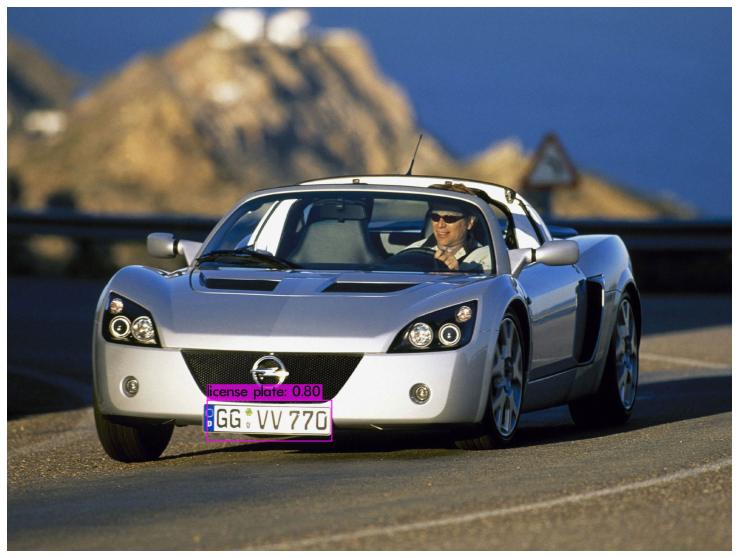

In [26]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()
imShow('predictions.jpg')